In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets, linear_model

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

%matplotlib inline

In [12]:
#main_directory = "/data0/jamesarnemann/cosmoNet/orig_paper/"
#main_directory_2 = "/data1/jamesarnemann/cosmoNet/new_data_3_param_1/"

main_directory_2 = "/data0/jamesarnemann/cosmoNet/new_data_3_param_n0/"
model_directories = {}

#model_directories["original data"] = main_directory + "temp_results_0_vanilla_code/"
#model_directories["original data rerun"] = main_directory + "result/"

model_directories["three params Ns"] = main_directory_2 + "result/"

#model_directories["new model 1(run 1)"] = main_directory + "first_change_result"
#model_directories["new model 1(run 2)"] = main_directory + "first_change_result2"
#model_directories["new model 2"] = main_directory + "second_change_result"

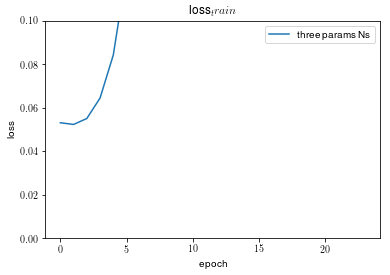

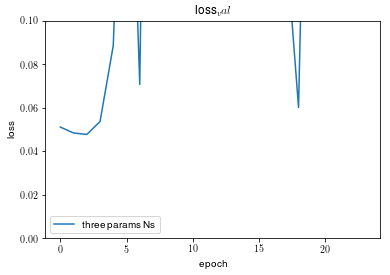

In [13]:
loss_types = ['loss_train','loss_val']
for loss_type in loss_types:
    file_type = '/' + loss_type + '.txt'
    plot ={}
    for model,model_dir in model_directories.iteritems():
        loss_file = open(model_dir + file_type, "r")

        loss = [float(val) for val in loss_file.read().splitlines()]

        plot[model], = plt.plot(loss, label=model)
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.title(loss_type)

#    plt.xlim((0,100))
    plt.ylim((0,.1))
    plt.legend(handles=[plot[model] for model in model_directories])
    plt.show()

In [14]:
loss_type = 'loss_test'
file_type = '/' + loss_type + '.txt'
loss = {}
for model,model_dir in model_directories.iteritems():
    loss_file = open(model_dir + file_type, "r")

    loss[model] = np.array([float(val) for val in loss_file.read().splitlines()])

for model in model_directories:
    print model + " test-loss(mean,std):", loss[model].mean(),loss[model].std()

# print "paper test loss:", o_loss.mean(), o_loss.std()
# print "new test loss:", n_loss.mean(), n_loss.std()
# print "difference:", n_loss.mean()-o_loss.mean()
# print "difference std:", (n_loss-o_loss).std()

three params Ns test-loss(mean,std): 0.0497343350696 0.0224919753293


In [15]:
[2.905168635566176411e-02,4.023372385668218254e-02]

[0.029051686355661764, 0.04023372385668218]

In [16]:
test_results = {}
for model,model_dir in model_directories.iteritems():
    for i in range(49):
        file_name = 'test_batch_' + str(i) +'.txt'
        test_loss_file = open(model_dir + file_name, "r")
        print model
        print model_dir
        print file_name
        if not test_results.has_key(model):
            test_results[model] = []
        test_results[model].append(np.array([x.split() for x in test_loss_file.read().splitlines()],dtype=np.float32))
    test_results[model] = np.array(test_results[model])

three params Ns
/data0/jamesarnemann/cosmoNet/new_data_3_param_n0/result/
test_batch_0.txt
three params Ns
/data0/jamesarnemann/cosmoNet/new_data_3_param_n0/result/
test_batch_1.txt
three params Ns
/data0/jamesarnemann/cosmoNet/new_data_3_param_n0/result/
test_batch_2.txt
three params Ns
/data0/jamesarnemann/cosmoNet/new_data_3_param_n0/result/
test_batch_3.txt
three params Ns
/data0/jamesarnemann/cosmoNet/new_data_3_param_n0/result/
test_batch_4.txt
three params Ns
/data0/jamesarnemann/cosmoNet/new_data_3_param_n0/result/
test_batch_5.txt
three params Ns
/data0/jamesarnemann/cosmoNet/new_data_3_param_n0/result/
test_batch_6.txt
three params Ns
/data0/jamesarnemann/cosmoNet/new_data_3_param_n0/result/
test_batch_7.txt
three params Ns
/data0/jamesarnemann/cosmoNet/new_data_3_param_n0/result/
test_batch_8.txt
three params Ns
/data0/jamesarnemann/cosmoNet/new_data_3_param_n0/result/
test_batch_9.txt
three params Ns
/data0/jamesarnemann/cosmoNet/new_data_3_param_n0/result/
test_batch_10.tx

In [17]:
test_results

{'three params Ns': array([[[ 0.338     ,  0.91500002,  0.99000001,  0.32502061,  0.94042504,
           0.97680902],
         [ 0.338     ,  0.91500002,  0.99000001,  0.31842235,  0.92390466,
           0.97065288],
         [ 0.338     ,  0.91500002,  0.99000001,  0.3125422 ,  0.91647059,
           0.96555781],
         ..., 
         [ 0.338     ,  0.91500002,  0.99000001,  0.32075226,  0.93847424,
           0.97349817],
         [ 0.338     ,  0.91500002,  0.99000001,  0.31772336,  0.92679912,
           0.96861148],
         [ 0.338     ,  0.91500002,  0.99000001,  0.31821626,  0.93127334,
           0.97153807]],
 
        [[ 0.32800001,  0.78799999,  0.94199997,  0.30002752,  0.84513652,
           0.94579518],
         [ 0.32800001,  0.78799999,  0.94199997,  0.30058956,  0.86170781,
           0.95059144],
         [ 0.32800001,  0.78799999,  0.94199997,  0.30038634,  0.84607983,
           0.94519758],
         ..., 
         [ 0.32800001,  0.78799999,  0.94199997,  0.30054

three params Ns
(49,)


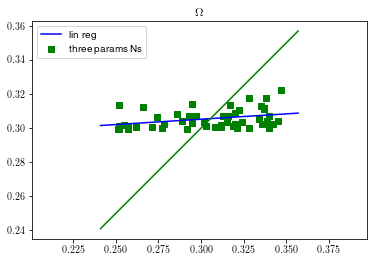

three params Ns
(49,)


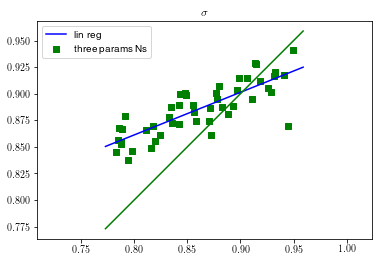

three params Ns
(49,)


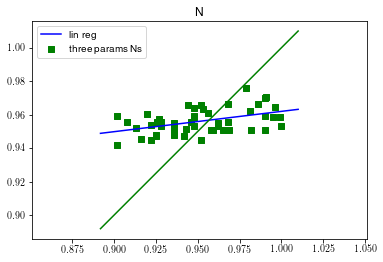

In [23]:
np.mean(test_results['three params Ns'],axis=1).shape
param = 0
labels = [r'\Omega',r'\sigma',u'N']
markers = ['s','x','o']
colors = ['green','blue','red']

for param in range(0,3):
    for index , model in enumerate(model_directories):
        x = []
        y = []
        averages = np.mean(test_results[model],axis=1)
        for i in range(averages.shape[0]):
            x.append(averages[i][param])
            y.append(averages[i][param+3])
        print model
        plt.scatter(x,y,marker=markers[index],c = colors[index],label = model)
        # Create linear regression object
        regr = linear_model.LinearRegression()
    
        # Train the model using the training sets
        print np.array(y).shape
        regr.fit(np.array(x).reshape(-1,1), np.array(y).reshape(-1,1))
        
        
        #plt.plot([.2,.4],[.2,.4])
        extremes = [np.min(averages[:,[param,param+3]])-.01,np.max(averages[:,[param,param+3]])+.01]
        
        plt.plot(np.array(extremes).reshape(-1,1),regr.predict(np.array(extremes).reshape(-1,1)),c='blue',label='lin reg')
        
        plt.plot(extremes,extremes,c='green')
    plt.legend()
    plt.title(labels[param])
    plt.axis('equal')
    plt.show()

three params Ns


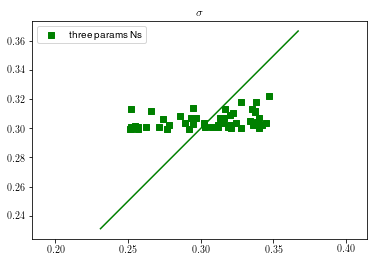

three params Ns


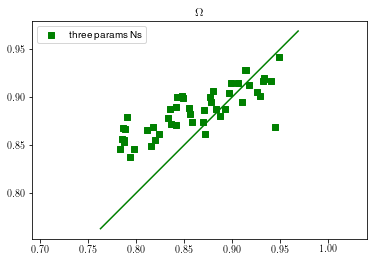

three params Ns


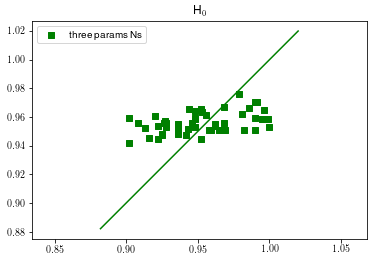

In [19]:
np.mean(test_results['three params Ns'],axis=1).shape
param = 0
labels = [r'\sigma',r'\Omega',r'H_0']
markers = ['s','x','o']
colors = ['green','blue','red']

for param in range(0,3):
    for index , model in enumerate(model_directories):
        x = []
        y = []
        averages = np.mean(test_results[model],axis=1)
        for i in range(averages.shape[0]):
            x.append(averages[i][param])
            y.append(averages[i][param+3])
        print model

        plt.scatter(x,y,marker=markers[index],c = colors[index],label = model)
        #plt.plot([.2,.4],[.2,.4])
        extremes = [np.min(averages[:,[param,param+3]])-.02,np.max(averages[:,[param,param+3]])+.02]
    plt.plot(extremes,extremes,c='green')
    plt.legend()
    plt.title(labels[param])
    plt.axis('equal')
    plt.show()

In [57]:
for model in model_directories:

    if test_results.has_key(model):
        print "------------"
        print model
        print r'actual sigma Omega predicted sigma Omega average'
        for i in range(6):
            print np.mean(np.mean(test_results[model][:,:,i],axis=1)),
        print ""
        print "predicted sigma Omega difference from actual"
        for i in range(2):
            print np.std(np.mean(test_results[model][:,:,i+3],axis=1)-np.mean(test_results[model][:,:,i],axis=1)),
        print ""

------------
three params
actual sigma Omega predicted sigma Omega average
0.302041 0.861694 0.689286 0.301314 0.855468 0.696356 
predicted sigma Omega difference from actual
0.0283878 0.0487328 


In [58]:
model_directories.keys()

['three params']

In [59]:
model_test = model_directories.keys()[0]

In [60]:
test_results[model_test]

array([[[ 0.26900002,  0.90100002,  0.63399994,  0.30247092,  0.85032165,
          0.69382507],
        [ 0.26900002,  0.90100002,  0.63399994,  0.30160472,  0.85306448,
          0.69511771],
        [ 0.26900002,  0.90100002,  0.63399994,  0.30229971,  0.85157657,
          0.69434386],
        ..., 
        [ 0.26900002,  0.90100002,  0.63399994,  0.30125144,  0.85629803,
          0.69676805],
        [ 0.26900002,  0.90100002,  0.63399994,  0.30141866,  0.85416132,
          0.69575179],
        [ 0.26900002,  0.90100002,  0.63399994,  0.30163059,  0.85359114,
          0.6954248 ]],

       [[ 0.31      ,  0.93800002,  0.67299998,  0.30096006,  0.85812551,
          0.69758165],
        [ 0.31      ,  0.93800002,  0.67299998,  0.3008408 ,  0.8575781 ,
          0.69735521],
        [ 0.31      ,  0.93800002,  0.67299998,  0.30091229,  0.85794598,
          0.69750977],
        ..., 
        [ 0.31      ,  0.93800002,  0.67299998,  0.30095178,  0.8582086 ,
          0.69758588],


In [61]:
for i in range(6):
    print np.std(test_results[model_test][:,0,i]),np.min(test_results[model_test][:,0,i]),np.max(test_results[model_test][:,0,i])

0.0283786 0.253 0.347
0.0487506 0.786 0.949
0.0592838 0.607 0.798
0.000381682 0.300932 0.30277
0.00221675 0.848933 0.858348
0.00104462 0.693249 0.697698


In [62]:
for i in range(4):
    print np.std(test_results['original data rerun'][:,0,i]),np.min(test_results['original data rerun'][:,0,i]),np.max(test_results['original data rerun'][:,0,i])


KeyError: 'original data rerun'

In [36]:
.34-.25

0.09000000000000002

In [38]:
5.6e-02

0.056